# Homework 3: Clustering Old Faithful Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Ensure plots are inline
%matplotlib inline

In [2]:
# Load the dataset
file_path = 'faithful.csv'
data = pd.read_csv(file_path)
data.columns = ['eruption_time', 'waiting_time']

# Display the first few rows of the dataset
data.head()

,eruption_time,waiting_time
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


## 1 (a) Scatter plot

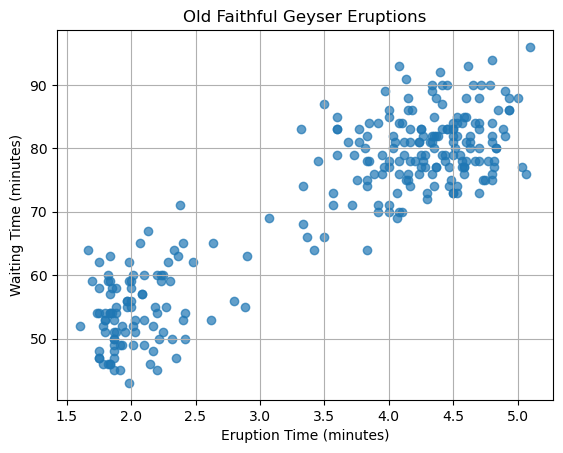

In [3]:
# Eruption time versus Waiting time
plt.scatter(data['eruption_time'], data['waiting_time'], alpha=0.7)
plt.title("Old Faithful Geyser Eruptions")
plt.xlabel("Eruption Time (minutes)")
plt.ylabel("Waiting Time (minutes)")
plt.grid(True)
plt.show()


## 2 (a) Implementing K-Means Algorithm

In [4]:
# Implement the K-Means algorithm from scratch
class KMeans:
    def __init__(self, n_clusters, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        self.centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)])
            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [ ]:
X = data.values

# Number of clusters identified in Problem 1
n_clusters = 2

# Fit KMeans
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)


### scatter plot of clusters

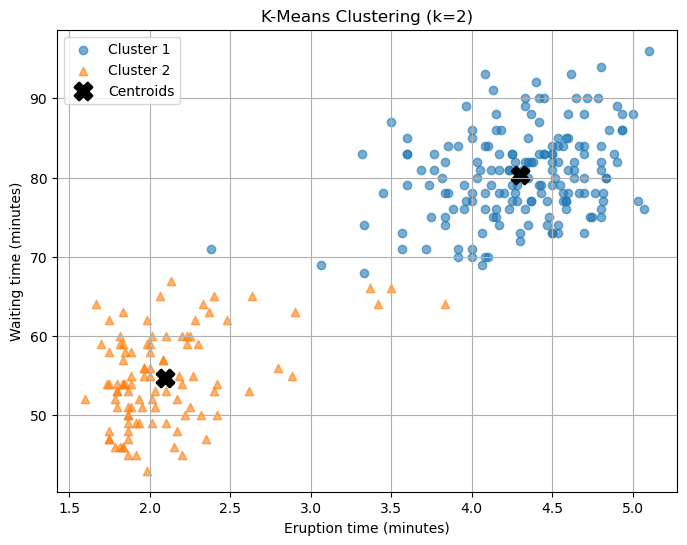

In [7]:
# Part (b): Scatter plot of final clustering with centers
plt.figure(figsize=(8,6))
# use different markers/colors for each cluster
markers = ['o', '^']
colors  = ['C0', 'C1']
for cluster_id in range(kmeans.n_clusters):
    cluster_pts = X[kmeans.labels == cluster_id]
    plt.scatter(
        cluster_pts[:, 0],
        cluster_pts[:, 1],
        marker=markers[cluster_id],
        color=colors[cluster_id],
        alpha=0.6,
        label=f'Cluster {cluster_id+1}'
    )
# plot the cluster centers
plt.scatter(
    kmeans.centroids[:, 0],
    kmeans.centroids[:, 1],
    marker='X',
    s=150,
    c='k',
    linewidths=2,
    label='Centroids'
)
plt.title('K-Means Clustering (k=2)')
plt.xlabel('Eruption time (minutes)')
plt.ylabel('Waiting time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

## 2c: Objective Function

In [8]:
# objective_values = []
# centroids = kmeans.centroids
# for i in range(kmeans.max_iters):
#     distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
#     labels = np.argmin(distances, axis=1)
#     obj_value = np.sum((X - centroids[labels])**2)
#     objective_values.append(obj_value)

# # Plot the objective function vs iterations
# plt.figure(figsize=(8, 6))
# plt.plot(range(len(objective_values)), objective_values, marker='o')
# plt.title('K-Means Objective Function vs Iterations')
# plt.xlabel('Iteration')
# plt.ylabel('Objective Function Value')
# plt.show()

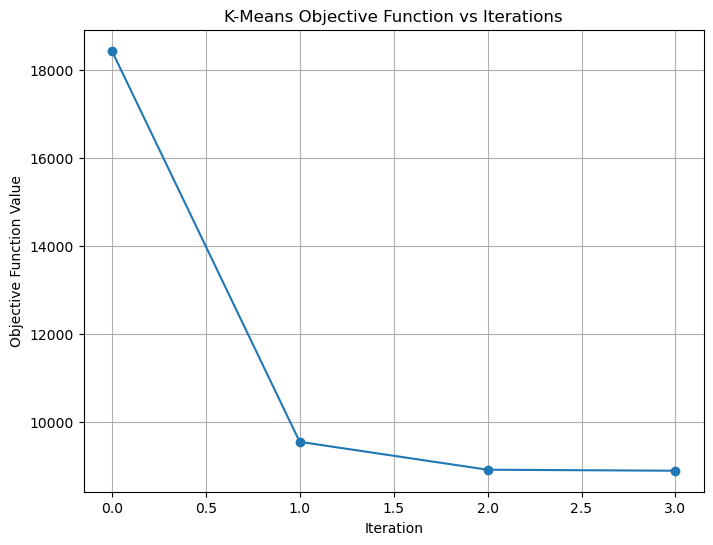

In [9]:
# update the centroids

objective_values = []

# Initialize centroids randomly from X
np.random.seed(42)
centroids = X[np.random.choice(len(X), size=2, replace=False)]

for i in range(100):
    # Step 1: Assign each point to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Step 2: Compute the new centroids
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(2)])

    # Step 3: Calculate objective function (sum of squared distances)
    obj_value = np.sum((X - centroids[labels]) ** 2)
    objective_values.append(obj_value)

    # Step 4: Check for convergence
    if np.allclose(centroids, new_centroids):
        break

    centroids = new_centroids

# Plot the objective function vs iterations
plt.figure(figsize=(8, 6))
plt.plot(range(len(objective_values)), objective_values, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.grid(True)
plt.show()

